In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from eval import *
import pandas as pd
import numpy as np

In [3]:
def get_data(path_real, path_fake, real_sep=';', fake_sep=',', drop_columns=None):
    real = pd.read_csv(path_real, sep=real_sep, low_memory=False)
    fake = pd.read_csv(path_fake, sep=fake_sep, low_memory=False)
    shared_min = min(len(fake), len(real))
    real = real.sample(shared_min)
    fake = fake.sample(shared_min)
    if set(fake.columns.tolist()).issubset(set(real.columns.tolist())):
        real = real[fake.columns]
    elif drop_columns is not None:
        real = real.drop(drop_columns, axis=1)
        try:
            fake = fake.drop(drop_columns, axis=1)
        except:
            print(f'Some of {drop_columns} were not found on real.index.')
        assert len(fake.columns.tolist()) == len(real.columns.tolist()), f'Real and fake do not have same nr of columns: {len(fake.columns)} and {len(real.columns)}'
        fake.columns = real.columns
    else:
        fake.columns = real.columns
        
    for col in fake.columns:
        fake[col] = fake[col].astype(real[col].dtype)
    return real, fake

## Dia Samples

In [ ]:
real
tgan_org_evaluator.fake
wgan_evaluator.fake
skip_evaluator.fake
medgan_evaluator.fake
tablegan_evaluator.fake

In [ ]:
sample_tgan = tgan_org_evaluator.fake.sample(50)
sample_tgan['model'] = 'tgan'

sample_wgan = wgan_evaluator.fake.sample(50)
sample_wgan['model'] = 'wgan'

sample_skip = skip_evaluator.fake.sample(50)
sample_skip['model'] = 'skip'

sample_medgan = medgan_evaluator.fake.sample(50)
sample_medgan['model'] = 'medgan'

sample_tablegan = tablegan_evaluator.fake.sample(50)
sample_tablegan['model'] = 'tablegan'

total_sample = pd.concat([sample_tgan, sample_wgan, sample_skip, sample_medgan, sample_tablegan])
total_sample['real'] = None
total_sample = total_sample.sort_values('trans_date')
# num_cols = total_sample._get_numeric_data().columns.tolist()
# total_sample[num_cols] = total_sample[num_cols].astype('int')
total_sample = total_sample[total_sample.trans_amount > 0]
total_sample

In [32]:
total_sample = total_sample.round({'trans_amount': 1, 'balance_after_trans': 1})

In [33]:
tar_dir = '../final_data/dia_samples'
for name in ['v1', 'v2', 'v3', 'v4', 'v5']:
    g = total_sample.sample(50).sort_values('trans_date')
#     num_cols = g._get_numeric_data().columns.tolist()
#     g[num_cols] = g[num_cols].astype('int')
    g.to_csv(f'{tar_dir}/sample_{name}_ground_truth.csv', index=False, sep=';')
    g.drop(['model'], axis=1).to_csv(f'{tar_dir}/sample_{name}.csv', index=False, sep=';')

In [12]:
berka_real = pd.read_csv('../data/berka/berka_cat.csv', sep=';')

C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
berka_sample = berka_real.sample(50).drop(['trans_bank_partner', 'trans_account_partner'], axis=1).sort_values('trans_date')
berka_sample.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
14053,193374,655,14.6,42460.8,WITHDRAWAL,WITHDRAWAL_IN_CASH,PAYMENT_FOR_STATEMENT,272
44255,185206,628,4543.0,24705.1,CREDIT,CREDIT_IN_CASH,UNKNOWN,431
89345,788247,2687,3830.0,27822.6,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,621
114825,857875,2924,5100.0,29689.1,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,713
120072,3094834,10266,6000.0,68292.3,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,730


In [23]:
berka_sample.to_csv('../final_data/dia_samples/berka_real.csv', index=False, sep=';')

# Berka

## Original TGAN

In [6]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/berka_sample_tgan.csv')
tgan_org_evaluator = DataEvaluator(real, fake)

In [9]:
tgan_org_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: kendalltau


C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classifier F1-scores:
                                      real   fake
real_data_SGDClassifier_F1          0.5280 0.7774
real_data_LogisticRegression_F1     0.7960 0.7932
real_data_RandomForestClassifier_F1 0.9828 0.9817
real_data_DecisionTreeClassifier_F1 0.9745 0.9522
real_data_MLPClassifier_F1          0.5936 0.7590
fake_data_SGDClassifier_F1          0.4317 0.7801
fake_data_LogisticRegression_F1     0.7905 0.7891
fake_data_RandomForestClassifier_F1 0.9806 0.9807
fake_data_DecisionTreeClassifier_F1 0.9675 0.9651
fake_data_MLPClassifier_F1          0.5908 0.7790

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9789
Correlation column correlations                 0.8997
Mean Correlation between fake and real columns  0.9613
Mean correlation classifier F1                  0.7333
Correlation 5 PCA components                    1.0000
Duplicate data between sets       

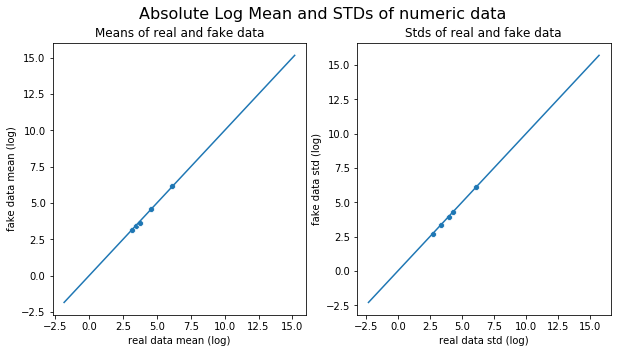

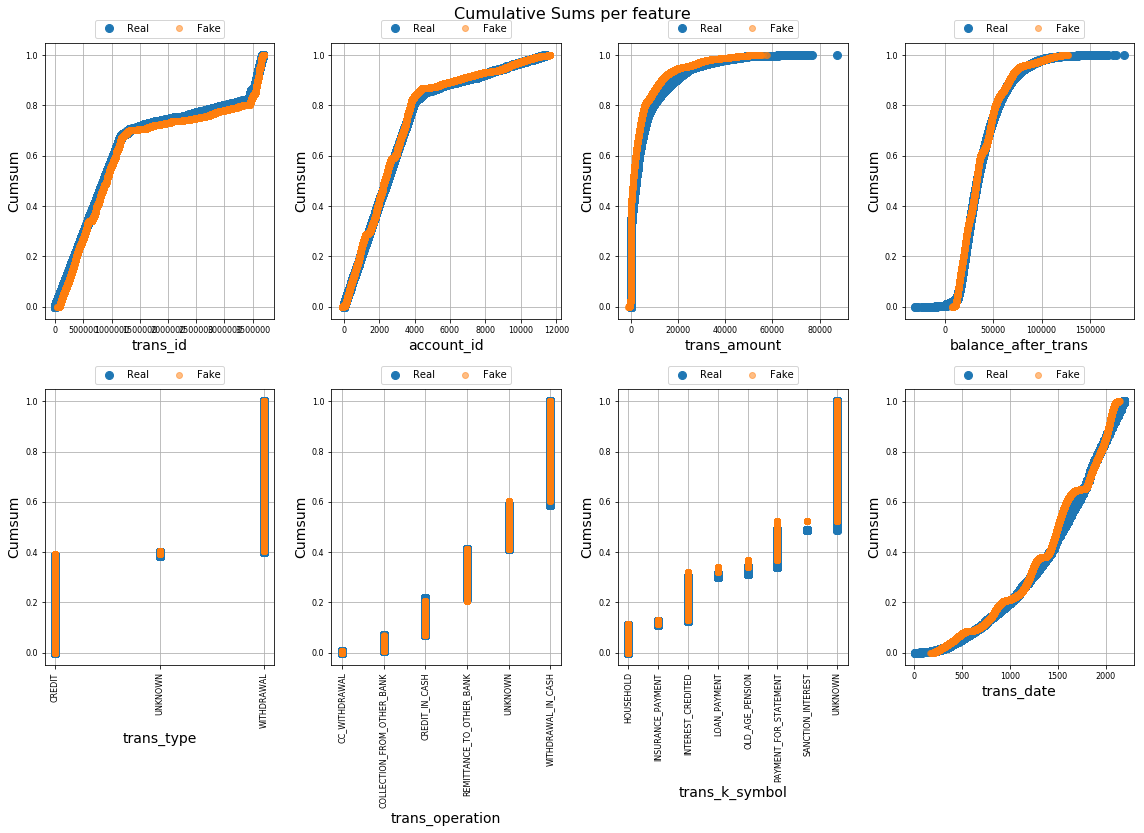

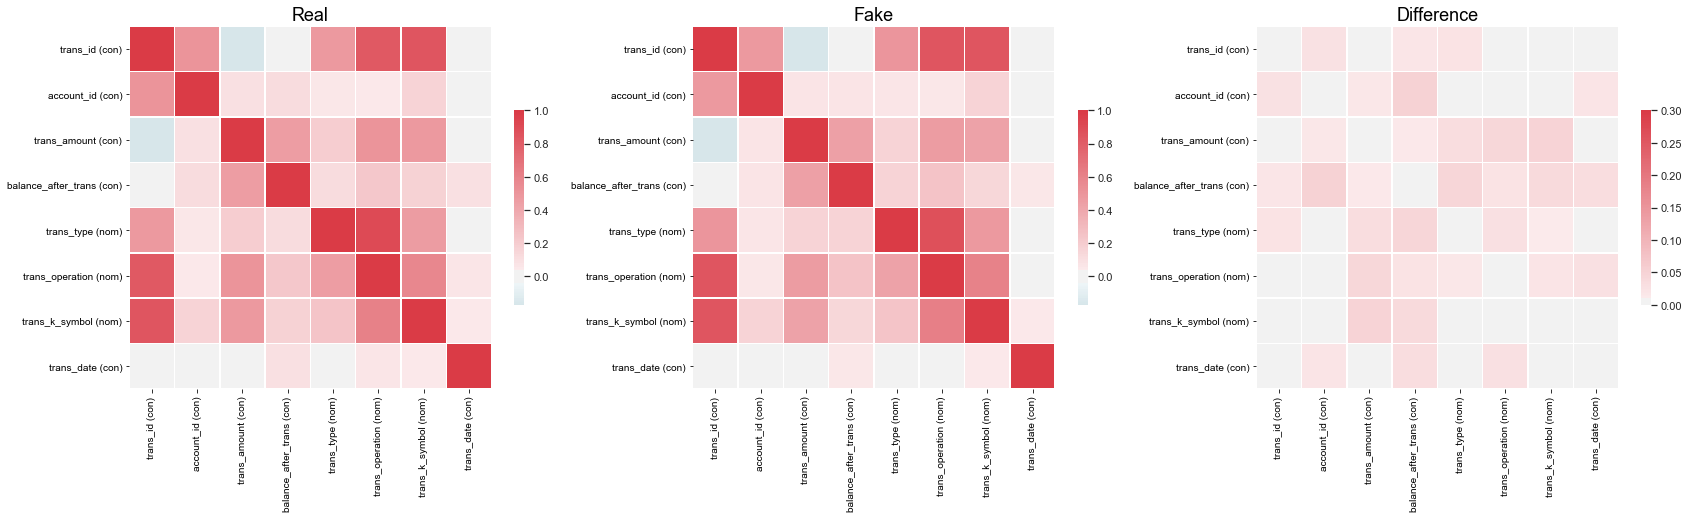

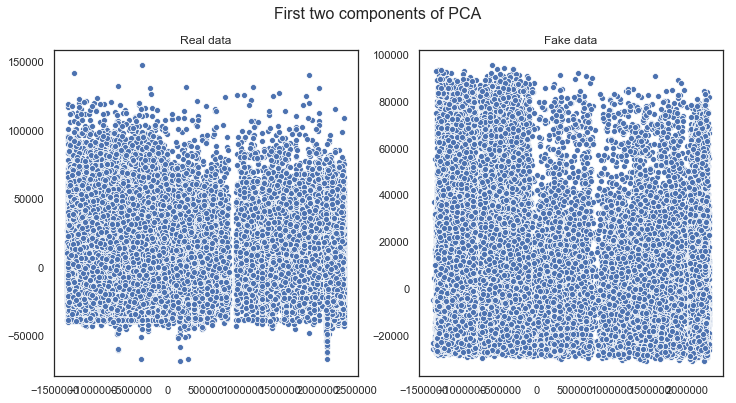

In [10]:
tgan_org_evaluator.visual_evaluation(annot=False)

## WGAN-GP

In [11]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/berka_sample_tgan-wgan-gp.csv')
wgan_evaluator = DataEvaluator(real, fake)

In [12]:
wgan_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: kendalltau


C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classifier F1-scores:
                                      real   fake
real_data_SGDClassifier_F1          0.8042 0.4425
real_data_LogisticRegression_F1     0.8019 0.7820
real_data_RandomForestClassifier_F1 0.9831 0.9707
real_data_DecisionTreeClassifier_F1 0.9763 0.9147
real_data_MLPClassifier_F1          0.6026 0.7932
fake_data_SGDClassifier_F1          0.7065 0.4117
fake_data_LogisticRegression_F1     0.7209 0.7272
fake_data_RandomForestClassifier_F1 0.9309 0.9425
fake_data_DecisionTreeClassifier_F1 0.9152 0.9107
fake_data_MLPClassifier_F1          0.5975 0.7310

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                1.0000
Correlation column correlations                 0.7650
Mean Correlation between fake and real columns  0.9475
Mean correlation classifier F1                  0.5556
Correlation 5 PCA components                    1.0000
Duplicate data between sets       

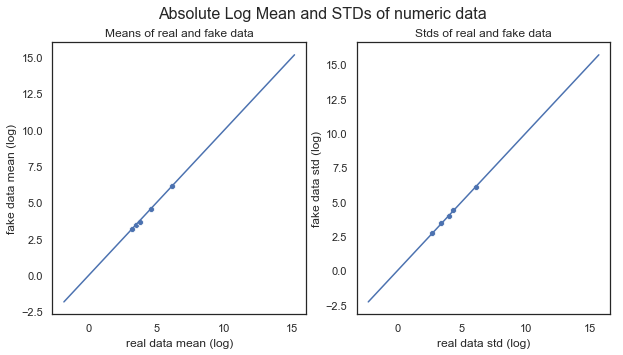

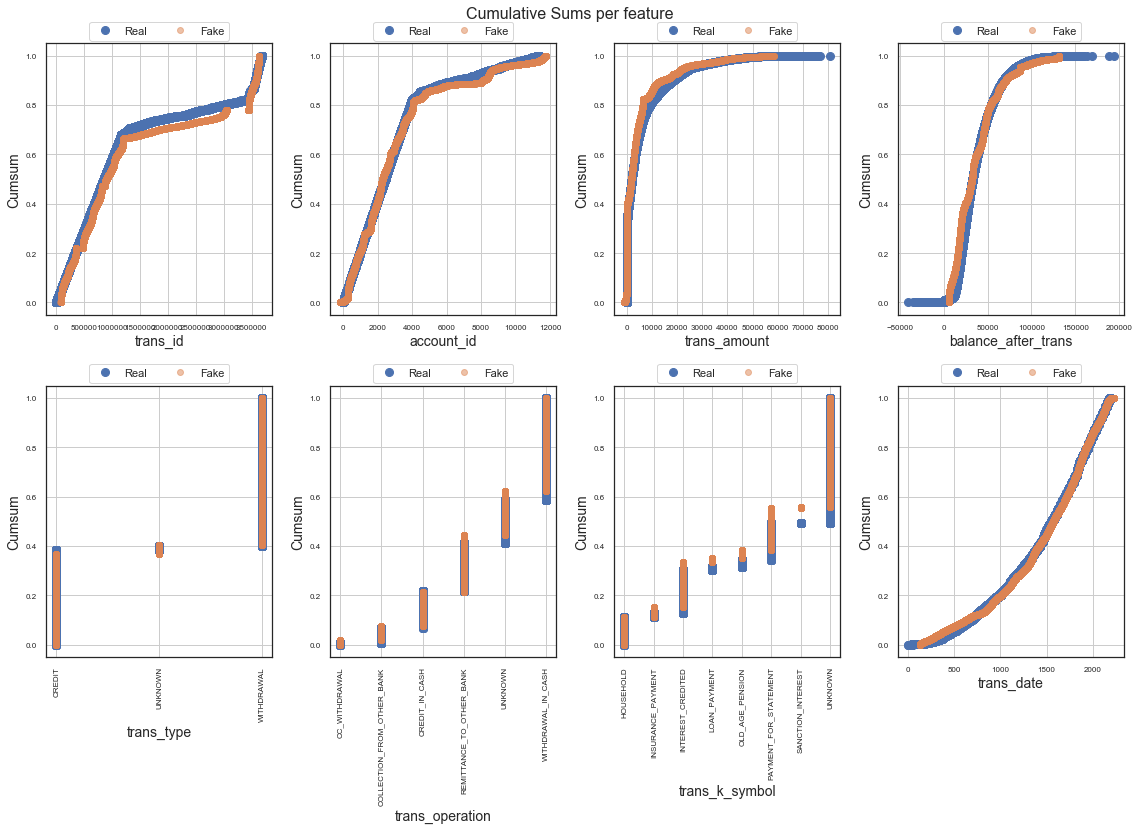

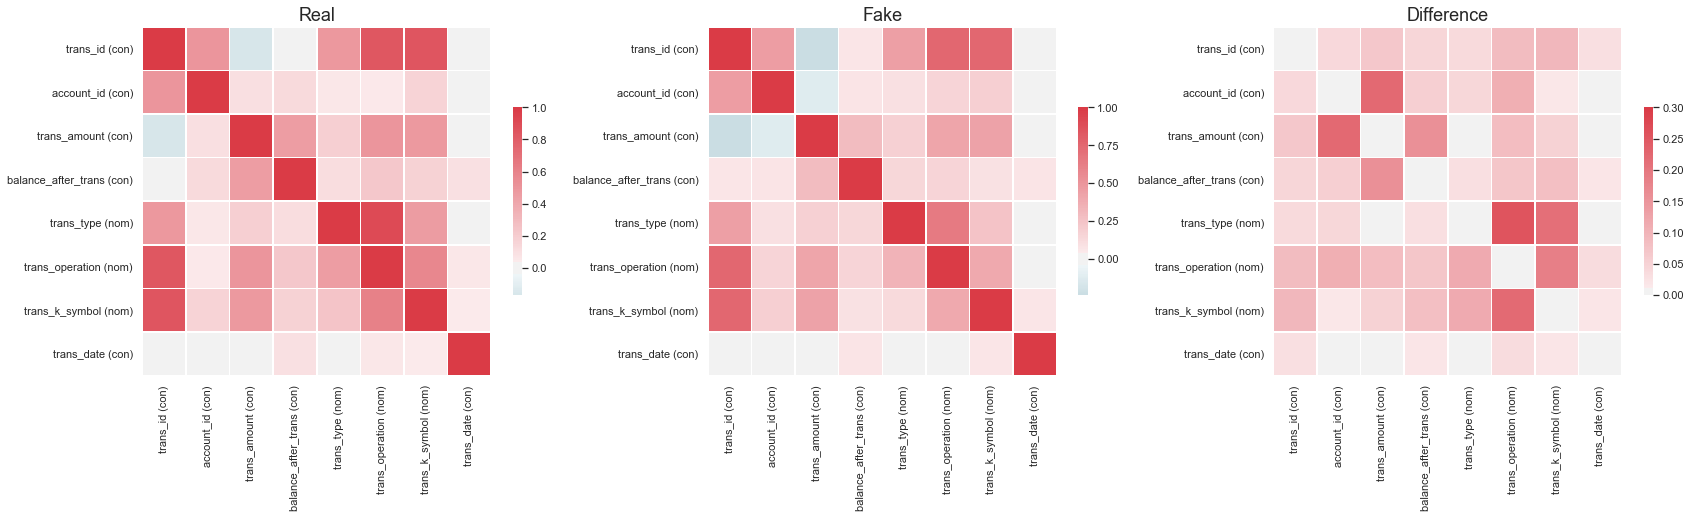

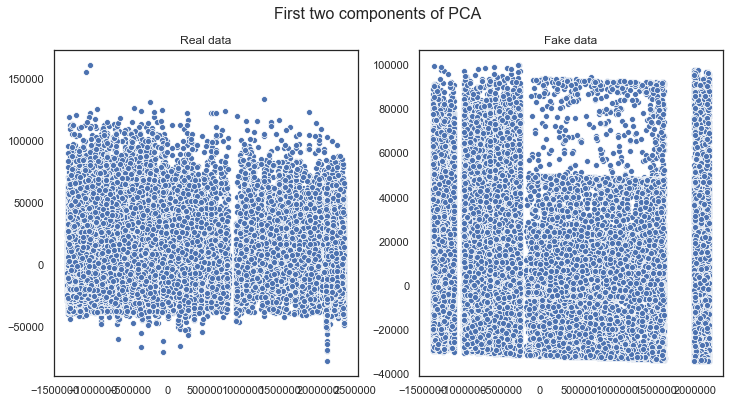

In [13]:
wgan_evaluator.visual_evaluation(annot=False)

## TGAN Skip Connections

In [14]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/berka_sample_tgan-skip-connections.csv')
skip_evaluator = DataEvaluator(real, fake)

In [15]:
skip_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: kendalltau


C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classifier F1-scores:
                                      real   fake
real_data_SGDClassifier_F1          0.8084 0.6917
real_data_LogisticRegression_F1     0.7992 0.7920
real_data_RandomForestClassifier_F1 0.9843 0.9826
real_data_DecisionTreeClassifier_F1 0.9754 0.9330
real_data_MLPClassifier_F1          0.7960 0.5886
fake_data_SGDClassifier_F1          0.5525 0.6762
fake_data_LogisticRegression_F1     0.7225 0.7532
fake_data_RandomForestClassifier_F1 0.9710 0.9717
fake_data_DecisionTreeClassifier_F1 0.9597 0.9415
fake_data_MLPClassifier_F1          0.7322 0.5760

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9579
Correlation column correlations                 0.8983
Mean Correlation between fake and real columns  0.9532
Mean correlation classifier F1                  0.6444
Correlation 5 PCA components                    1.0000
Duplicate data between sets       

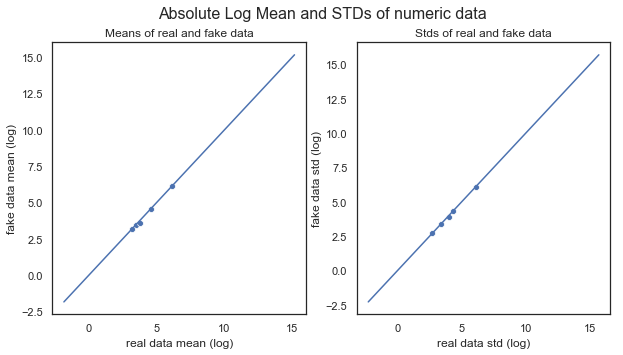

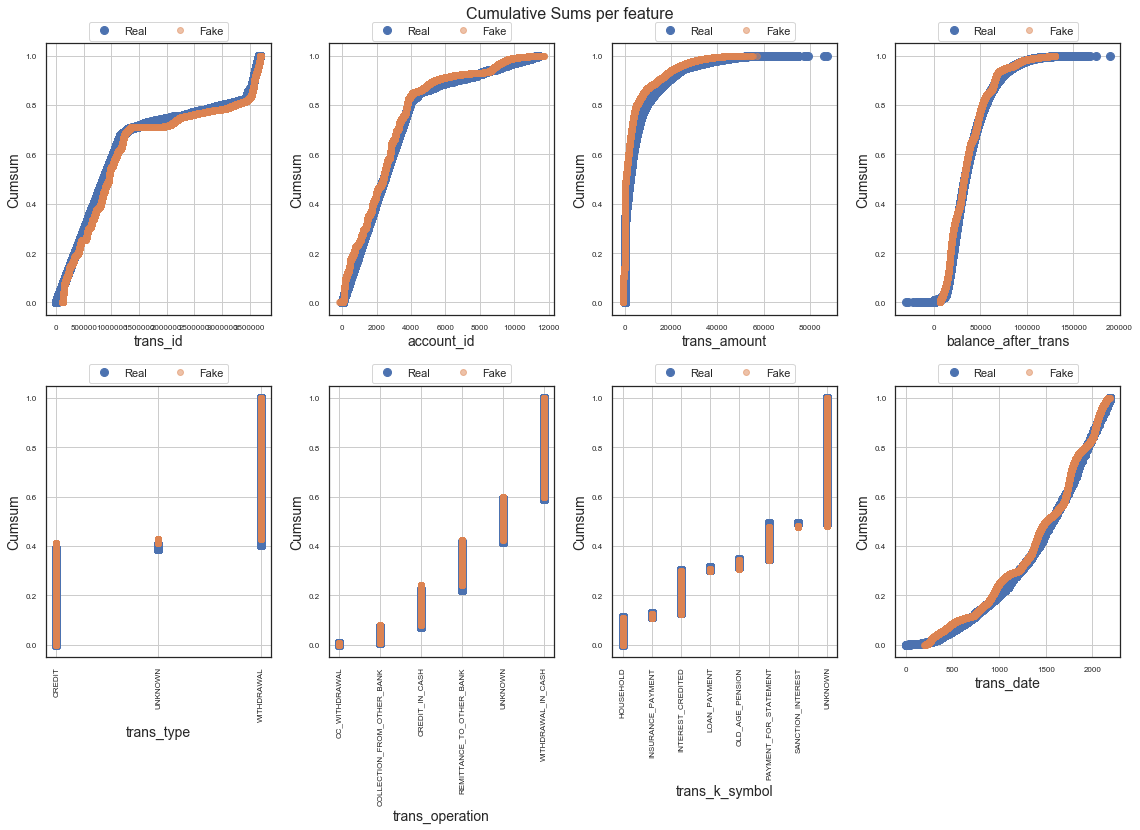

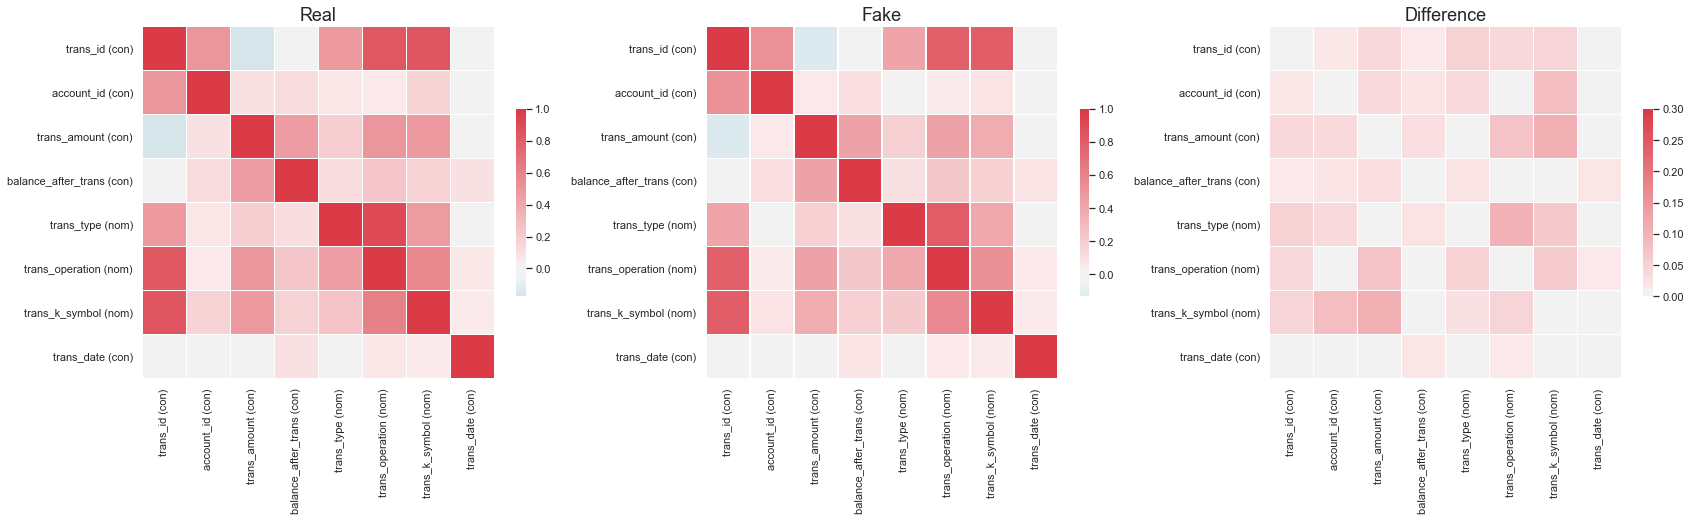

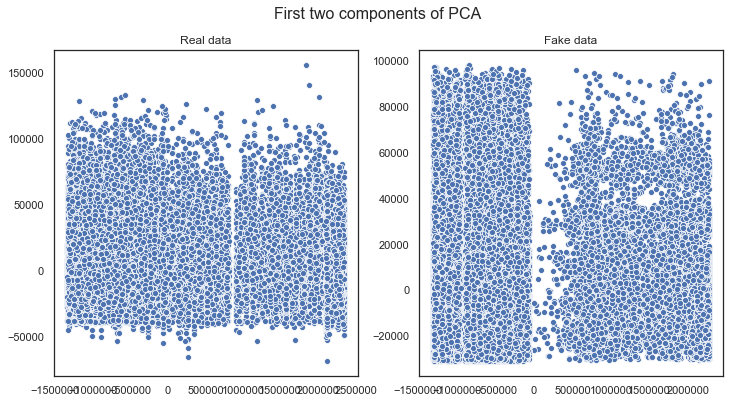

In [16]:
skip_evaluator.visual_evaluation(annot=False)

## MedGAN

In [17]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/sample_berka_medgan_100.csv')
medgan_evaluator = DataEvaluator(real, fake)

In [18]:
medgan_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: kendalltau


C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classifier F1-scores:
                                      real   fake
real_data_SGDClassifier_F1          0.7958 0.3574
real_data_LogisticRegression_F1     0.8000 0.7588
real_data_RandomForestClassifier_F1 0.9827 0.7040
real_data_DecisionTreeClassifier_F1 0.9737 0.9628
real_data_MLPClassifier_F1          0.8256 0.6895
fake_data_SGDClassifier_F1          0.1736 0.8573
fake_data_LogisticRegression_F1     0.1736 0.8591
fake_data_RandomForestClassifier_F1 0.9837 0.9983
fake_data_DecisionTreeClassifier_F1 0.9659 0.9981
fake_data_MLPClassifier_F1          0.1736 0.8337

Results:
Number of duplicate rows is ignored for total score.
                                                   Result
basic statistics                                   0.7579
Correlation column correlations                    0.5380
Mean Correlation between fake and real columns     0.5652
Mean correlation classifier F1                     0.1840
Correlation 5 PCA components                       1.0000
Duplicate data b

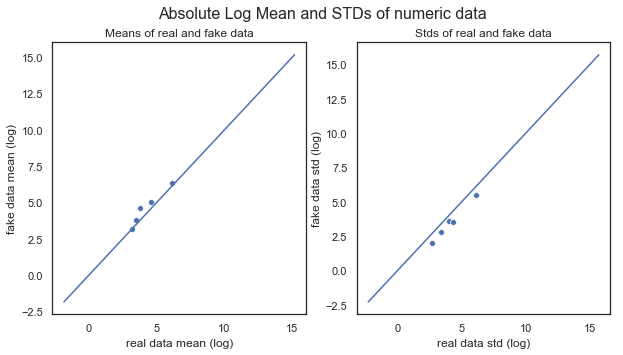

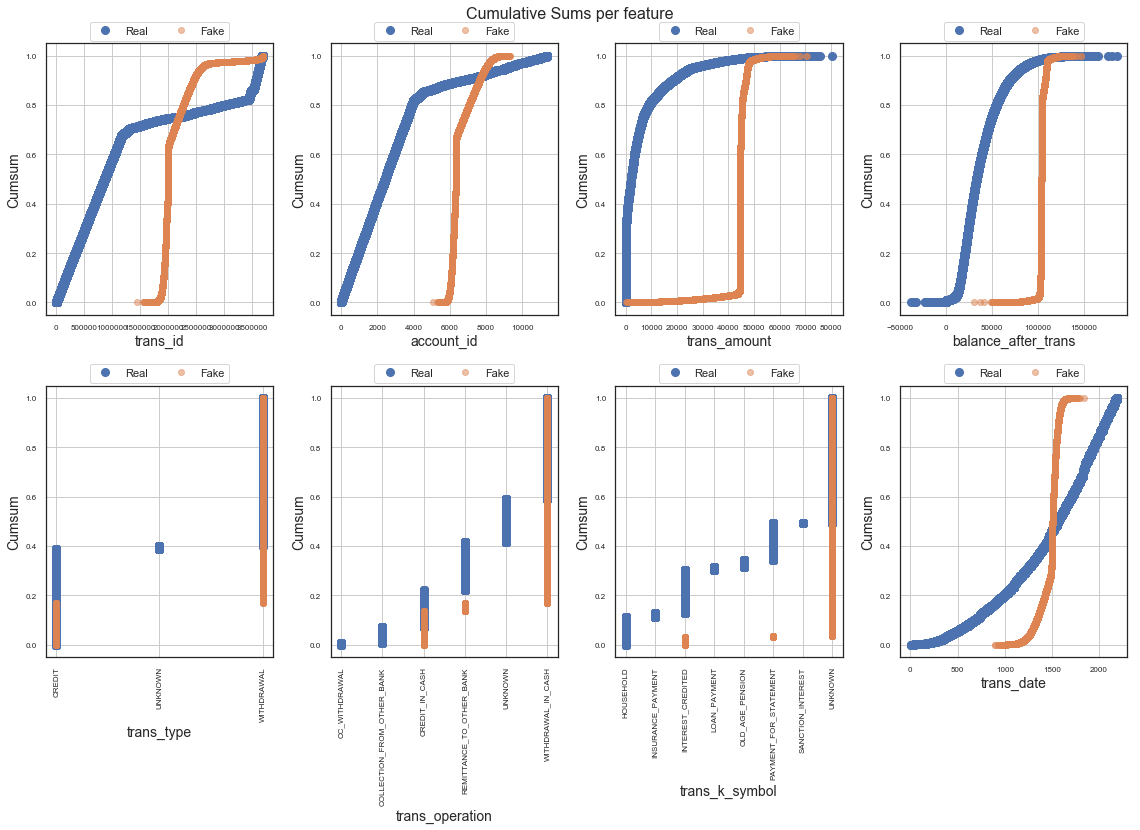

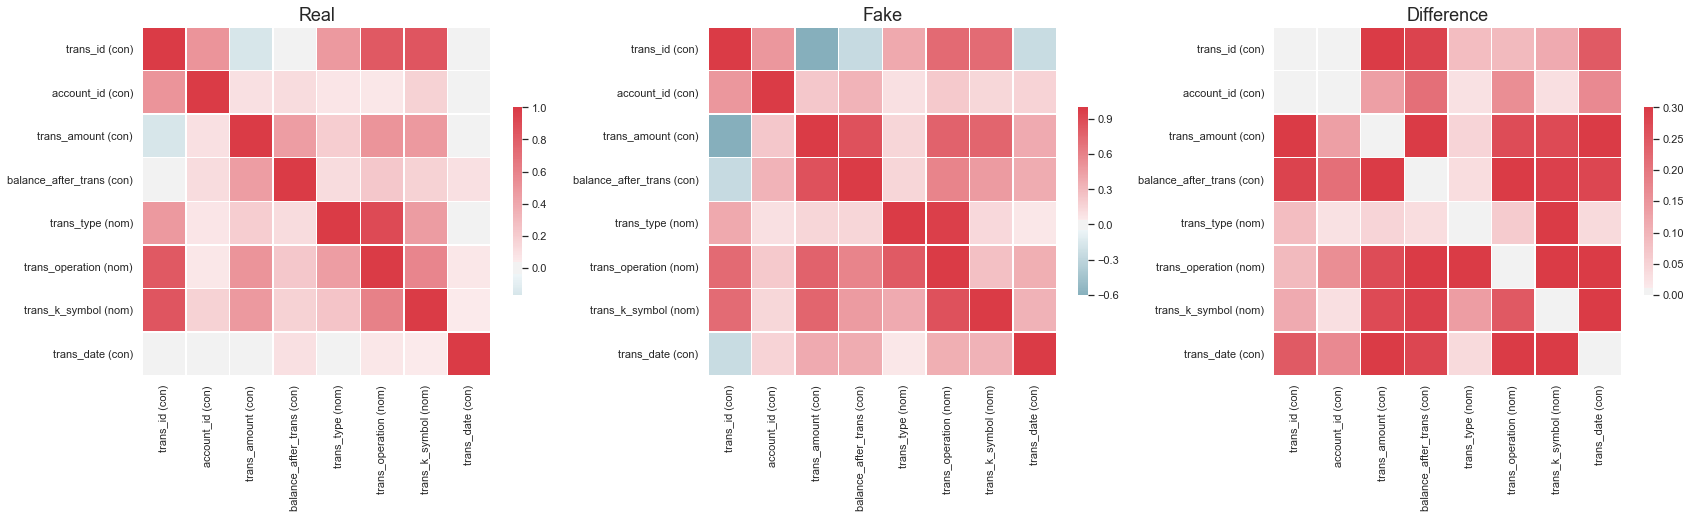

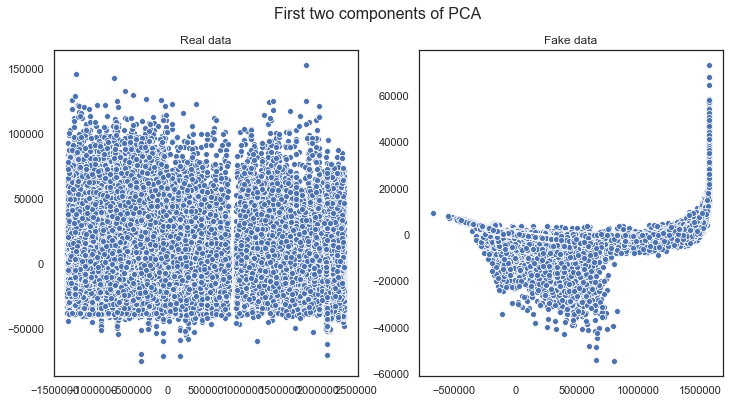

In [19]:
medgan_evaluator.visual_evaluation(annot=False)

## TableGAN

In [20]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/sample_berka_tablegan_100.csv')
tablegan_evaluator = DataEvaluator(real, fake)

In [21]:
tablegan_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: kendalltau


C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classifier F1-scores:
                                      real   fake
real_data_SGDClassifier_F1          0.7966 0.7499
real_data_LogisticRegression_F1     0.7996 0.7805
real_data_RandomForestClassifier_F1 0.9835 0.9077
real_data_DecisionTreeClassifier_F1 0.9736 0.8558
real_data_MLPClassifier_F1          0.6008 0.5777
fake_data_SGDClassifier_F1          0.7350 0.7207
fake_data_LogisticRegression_F1     0.7240 0.7077
fake_data_RandomForestClassifier_F1 0.7930 0.9064
fake_data_DecisionTreeClassifier_F1 0.8098 0.8798
fake_data_MLPClassifier_F1          0.6336 0.6337

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9684
Correlation column correlations                 0.5366
Mean Correlation between fake and real columns  0.9106
Mean correlation classifier F1                  0.7778
Correlation 5 PCA components                    1.0000
Duplicate data between sets       

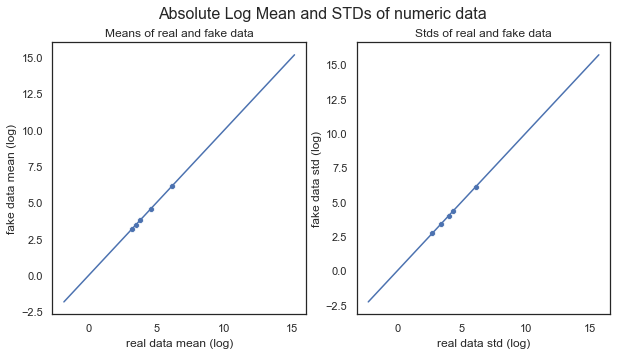

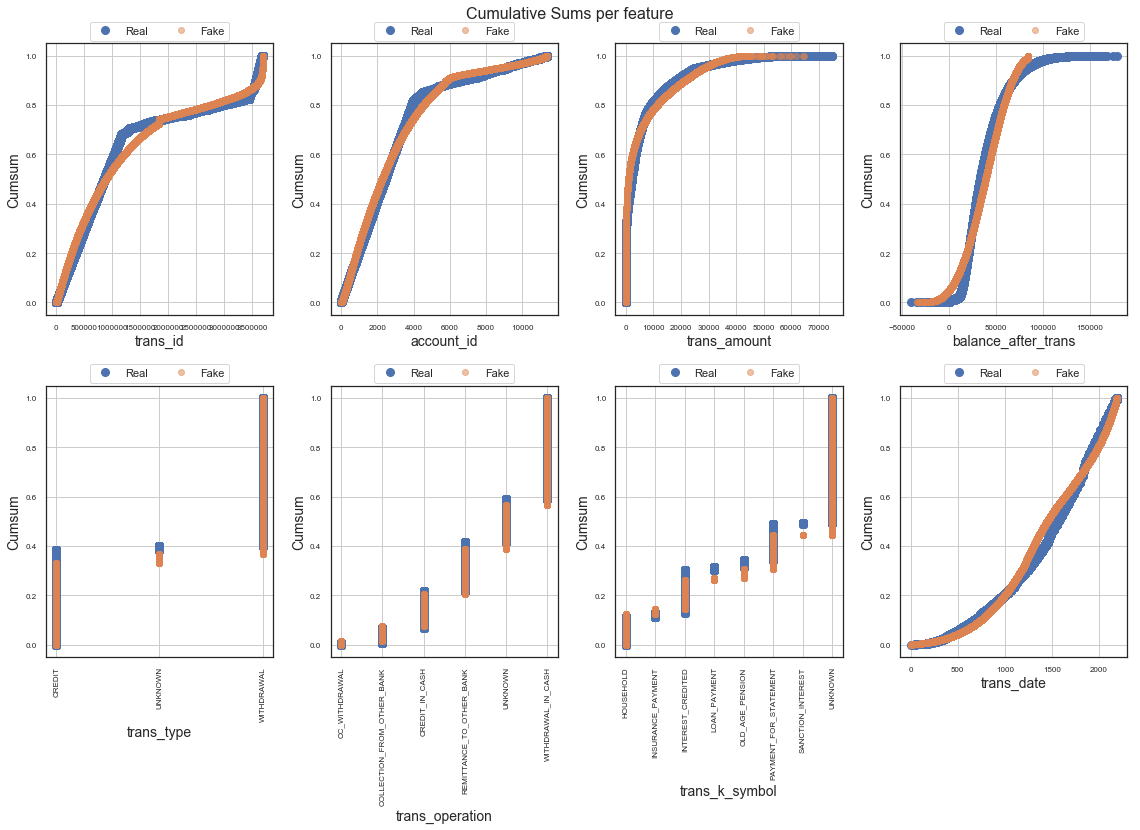

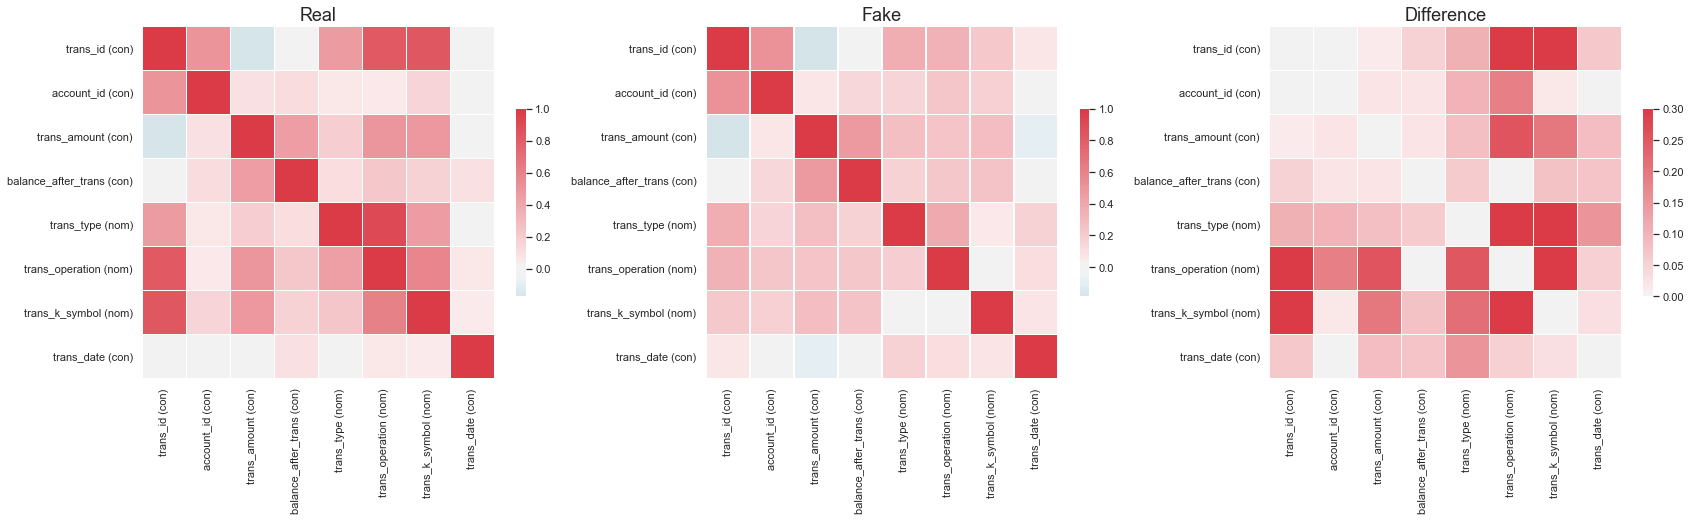

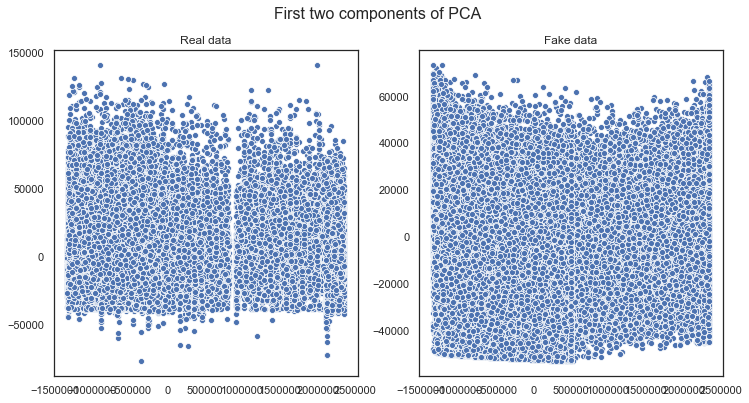

In [22]:
tablegan_evaluator.visual_evaluation(annot=False)

## Feature Importance

In [24]:
target_col = 'trans_type'
x = numerical_encoding(fake.drop([target_col], axis=1), nominal_columns=tgan_org_evaluator.categorical_columns)

[3.15558081e-03 2.25478515e-03 1.00895154e-02 1.60792182e-03 3.68700434e-03 0.00000000e+00 4.03186594e-05 0.00000000e+00 0.00000000e+00 3.42898353e-05 2.31575622e-04 0.00000000e+00 6.94454588e-04 2.26483782e-02
 1.71159461e-03 2.68261433e-03 5.46665979e-01 2.46056113e-03 4.02035426e-01]
Index(['trans_id', 'account_id', 'trans_amount', 'balance_after_trans',
       'trans_operation_CC_WITHDRAWAL',
       'trans_operation_COLLECTION_FROM_OTHER_BANK',
       'trans_operation_CREDIT_IN_CASH',
       'trans_operation_REMITTANCE_TO_OTHER_BANK', 'trans_operation_UNKNOWN',
       'trans_operation_WITHDRAWAL_IN_CASH', 'trans_k_symbol_HOUSEHOLD',
       'trans_k_symbol_INSURANCE_PAYMENT', 'trans_k_symbol_INTEREST_CREDITED',
       'trans_k_symbol_LOAN_PAYMENT', 'trans_k_symbol_OLD_AGE_PENSION',
       'trans_k_symbol_PAYMENT_FOR_STATEMENT',
       'trans_k_symbol_SANCTION_INTEREST', 'trans_k_symbol_UNKNOWN',
       'trans_date'],
      dtype='object')
[ 5  7  8 11  9  6 10 12  3 14  1 17 15  0  

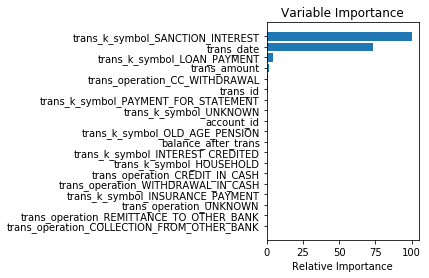

In [26]:
feature_importance = tgan_org_evaluator.f_classifiers[2].feature_importances_
print(feature_importance)
# feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
print(column_names)
print(sorted_idx)
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

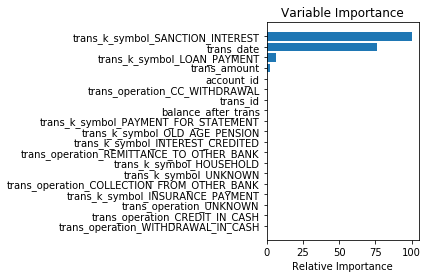

In [27]:
feature_importance = tgan_org_evaluator.r_classifiers[2].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()